# Statistical Analysis #

###  Dependencies  ###

In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import statsmodels.api as sm

str_path_file = "data/car_prices.csv"
df_car_prices = pd.read_csv(str_path_file)

### Dataframe Datatypes ###

In [2]:
df_car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


### Dataframes created from Numeric Columns from above cell ###

In [18]:
df_car_prices_subset = df_car_prices[["condition", "odometer", "sellingprice", "mmr", 'year']]
df_car_prices_subset2 = df_car_prices[["condition", "odometer", "sellingprice", "mmr"]]
df_car_prices_subset = df_car_prices_subset.dropna()
df_car_prices_subset2 = df_car_prices_subset.dropna()
df_car_prices_subset2 = df_car_prices_subset[df_car_prices_subset['sellingprice'] >= 50000]

### Description of dataframe ###

In [7]:
df_car_prices.describe()
#$13,611 is the mean selling price
#Standard Deviation is $9,749.  Suggests skew
#Max is 230,000

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### Correlation Matrix ###

In [15]:
correlation_matrix = df_car_prices_subset.corr()
print(correlation_matrix)

              condition  odometer  sellingprice       mmr      year
condition      1.000000 -0.318200      0.321912  0.281385  0.340297
odometer      -0.318200  1.000000     -0.578181 -0.583389 -0.772259
sellingprice   0.321912 -0.578181      1.000000  0.983826  0.579872
mmr            0.281385 -0.583389      0.983826  1.000000  0.589747
year           0.340297 -0.772259      0.579872  0.589747  1.000000


### Results of Correlation Matrix ###


-year + condition 0.34 (not very strong?)

-sellingprice + mmr = 0.98 (very strong)

-Condition not strongly correlated with any variable

-Other than mmr, odometer has the strongest impact on price

-Year might need to be a control variable for inflation?

### Regresion Model including year ###

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df_car_prices_subset contains your DataFrame with selected columns
# If not, replace it with your actual DataFrame name

# Prepare data: X (features) and y (target)
X = df_car_prices_subset.drop(columns=['sellingprice'])  # Features (all columns except 'saleprice')
y = df_car_prices_subset['sellingprice']                # Target variable ('saleprice')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2737394.5304502985
Coefficients: [ 3.74964176e+01 -1.18888075e-03  9.83761192e-01 -4.64515940e+01]
Intercept: 92377.67557129556


The Mean Squared Error (MSE) is a metric commonly used to evaluate the performance of a regression model. It measures the average squared difference between the actual (observed) values and the predicted values produced by the model.

Magnitude Relative to Car Prices: The MSE of 2,737,394 represents the average squared difference between the actual car prices and the predicted prices. If your car prices are measured in thousands or tens of thousands of dollars, this MSE might be considered quite high. It suggests that, on average, the model's predictions are off by a significant amount.

### Regression Model without year ###

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df_car_prices_subset contains your DataFrame with selected columns
# If not, replace it with your actual DataFrame name

# Prepare data: X (features) and y (target)
X = df_car_prices_subset2.drop(columns=['sellingprice'])  # Features (all columns except 'saleprice')
y = df_car_prices_subset2['sellingprice']                # Target variable ('saleprice')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 19766767.59960819
Coefficients: [ 4.17486610e+00 -3.71655900e-02  9.05256871e-01 -1.84386528e+02]
Intercept: 378211.3644691851


# Residual Plot #

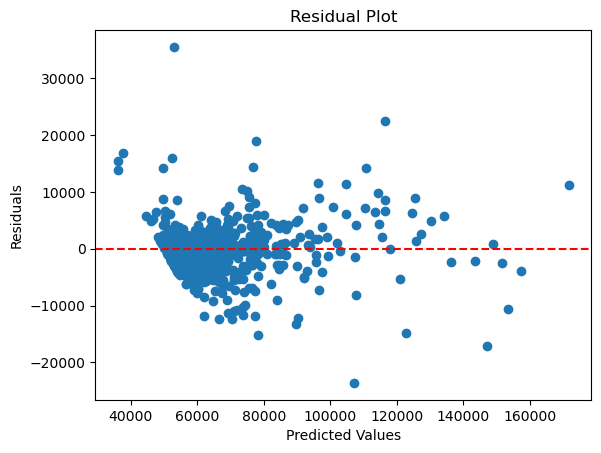

In [9]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

Suggested steps for regression model

    Prepare Data: Split your DataFrame into features (X) and the target variable (y).

    Split Data: Split your data into training and testing sets using train_test_split.

    Initialize Model: Create an instance of the linear regression model.

    Train Model: Train the model using the training data (X_train, y_train).

    Make Predictions: Use the trained model to make predictions on the testing data (X_test).

    Evaluate Model: Evaluate the model's performance using mean squared error (MSE) or any other suitable metric.

    Optional: You can print the coefficients and intercept of the linear regression model.

### Y predicted versus Y Actual ###

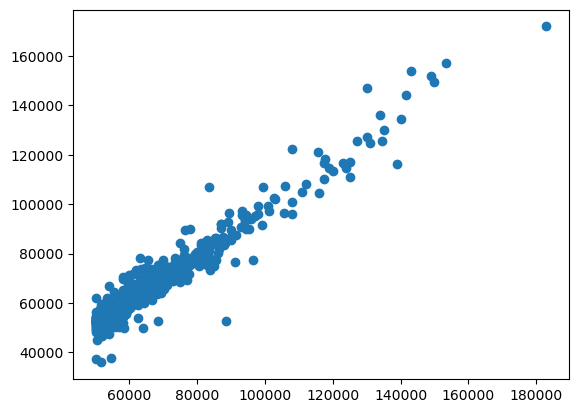

In [20]:
plt.scatter(y_test,y_pred)
plt.show()

### Y predicted versus condition ###

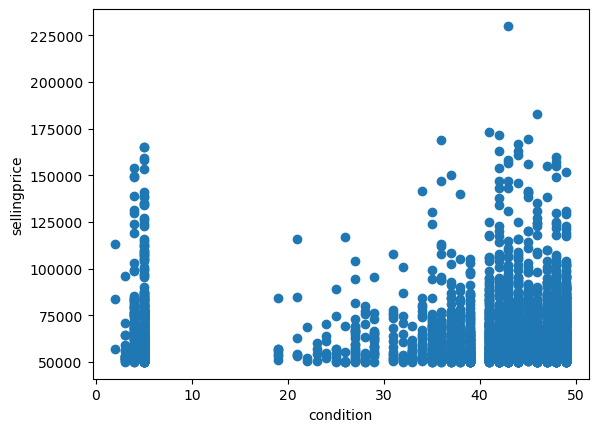

In [22]:
x = 'condition'
y = 'sellingprice'
x_values = df_car_prices_subset2[x]
y_values = df_car_prices_subset2[y]
plt.scatter(x_values,y_values)
plt.xlabel(x)
plt.ylabel(y)
plt.show()